In [ ]:
𝗽𝗲𝗿𝘀𝗼𝗻𝗮𝗹 𝗜𝗻𝗳𝗼𝗿𝗺𝗮𝘁𝗶𝗼𝗻 :
𝐏𝐡𝐨𝐧𝐞:   (+880) 1772905097  (Whatsapp)
𝘔𝘢𝘪𝘭:     jahidnoyon36@gmail.com
𝘍𝘣:         https://www.facebook.com/jahid22angry...

𝘗𝘢𝘨𝘦 :    https://www.facebook.com/jahid2ml
𝘓𝘪𝘯𝘬𝘦𝘥𝘐𝘕 :    https://www.linkedin.com/in/hellojahid
𝘎𝘪𝘵𝘩𝘶𝘣:  https://github.com/hellojahid

In [3]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Generator

In [4]:
#!/usr/bin/env python3
import sys
import numpy as np
from keras.layers import Dense, Reshape
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam

block_size = 128
num_blocks=4
OPTMIZER = Adam(lr=0.0002, decay=8e-9)

generator = Sequential()
generator.add(Dense(block_size, input_shape=(100, )))
generator.add(LeakyReLU(alpha=0.02))
generator.add(BatchNormalization(momentum=0.8))

for i in range(num_blocks-1):
    block_size = block_size * 2
    generator.add(Dense(block_size))
    generator.add(LeakyReLU(alpha=0.2))
    generator.add(BatchNormalization(momentum=0.8))

generator.add(Dense(28 * 28 * 1, activation='tanh'))
generator.add(Reshape((28, 28, 1)))
generator.compile(loss="binary_crossentropy", optimizer=OPTMIZER)

In [5]:
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               12928     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 128)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1

# Discriminator

In [6]:
import sys
import numpy as np
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam

SHAPE =  (28, 28, 1)
CAPACITY = 28 * 28 * 1
OPTMIZER = Adam(lr=0.0002, decay=8e-9)

discriminator = Sequential()
discriminator.add(Flatten(input_shape = SHAPE))
discriminator.add(Dense(CAPACITY, input_shape=SHAPE))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dense(int(CAPACITY/2)))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss="binary_crossentropy", optimizer=OPTMIZER)



In [7]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 784)               615440    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 392)               307720    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 392)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 393       
Total params: 923,553
Trainable params: 923,553
Non-trainable params: 0
________________________________________________

# GAN

In [8]:
OPTIMIZER = Adam(lr=0.0002, decay=8e-9)
discriminator.trainable = False

gan = Sequential()
gan.add(generator)
gan.add(discriminator)
gan.compile(loss="binary_crossentropy", optimizer=OPTMIZER)

In [9]:
gan.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 28, 28, 1)         1514128   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 923553    
Total params: 2,437,681
Trainable params: 1,510,288
Non-trainable params: 927,393
_________________________________________________________________


# Load MNIST

In [10]:
model_type = -1
def load_MNIST(model_type):

    allowed_types = [-1,0,1,2,3,4,5,6,7,8,9]

    if model_type not in allowed_types:
        print('ERROR: Only Integer Values from -1 to 9 are allowed')

    (X_train, Y_train), (_, _) = mnist.load_data()
    
    xxx = X_train
#     print("X_train: ", X_train.shape)
    if model_type!=-1:
        X_train = X_train[np.where(Y_train==int(model_type)) [0]]
        print("X_train: ", X_train.shape)

    X_train = ( np.float32(X_train) - 127.5) / 127.5
#     X_train = np.expand_dims(X_train, axis=3)
    
    return X_train, Y_train, xxx

In [11]:
X_train, Y_train, xxx = load_MNIST(model_type=3)

X_train:  (6131, 28, 28)


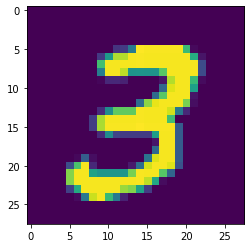

In [12]:
img = plt.imshow(X_train[0])

## Grab a batch

In [13]:
from random import randint

# Grab a batch
count_real_images = int(32/2)
starting_index = randint(0, (len(X_train) - count_real_images ))
starting_index

2546

In [14]:
real_images_raw = X_train[starting_index : (starting_index + count_real_images)]
real_images_raw.shape

(16, 28, 28)

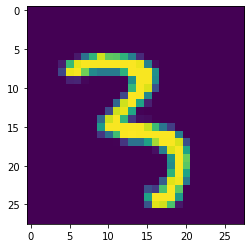

In [15]:
img = plt.imshow(real_images_raw[0])

In [16]:
x_real_images = real_images_raw.reshape(count_real_images, 28, 28, 1)
x_real_images.shape

(16, 28, 28, 1)

In [17]:
y_real_lebels = np.ones([count_real_images, 1])
y_real_lebels.shape

(16, 1)

##  Grab Generated Images for this training batch

In [18]:
LATENT_SPACE_SIZE = 100
def sample_latent_space(instances):
        return np.random.normal(0, 1, (instances, LATENT_SPACE_SIZE))

In [19]:
# Grab Generated Images for this training batch
latent_space_samples = sample_latent_space(count_real_images)
latent_space_samples.shape

(16, 100)

In [20]:
x_generated_images = generator.predict(latent_space_samples)

In [21]:
y_generated_labels = np.zeros([32-count_real_images,1])
y_generated_labels.shape 

(16, 1)

In [22]:
print(y_generated_labels[0], y_real_lebels[0])

[0.] [1.]


In [23]:
# Combine to train on the discriminator
x_batch = np.concatenate( [x_real_images, x_generated_images] )
y_batch = np.concatenate( [y_real_lebels, y_generated_labels] )

In [24]:
x_batch.shape

(32, 28, 28, 1)

In [25]:
y_batch[16]

array([0.])

## Train Adversarial Net

In [26]:
# Now, train the discriminator with this batch
discriminator_loss = discriminator.train_on_batch(x_batch,y_batch)
print("ok")

ok


In [27]:
# Generate Noise
x_latent_space_samples = sample_latent_space(32)
y_generated_labels = np.ones([32,1])
y_generated_labels.shape

(32, 1)

In [28]:
generator_loss = gan.train_on_batch(x_latent_space_samples, y_generated_labels)

In [29]:
print ('Epoch: '+str(int(1))+', [Discriminator :: Loss:'+str(discriminator_loss)+'], [ Generator :: Loss:'+str(generator_loss)+']')


Epoch: 1, [Discriminator :: Loss:0.7911103963851929], [ Generator :: Loss:0.6898584961891174]
